### 長庚資工碩一 M1129017 江佳倫 20220928

In [103]:
#長庚大學 資工系/人工智慧學程 樣形識別/深度學習 課程使用之教材及示範程式 Ch02參考 https://github.com/renyuanL/Cgu-Deep-Learning-Course-2022/blob/main/ryCh02.ipynb

In [104]:
!python -V

Python 3.8.8


In [105]:
#import package
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [106]:
#import data
#data type : 60000 28X28 images data
(x_train_images,y_train_labels),\
(x_test_images,y_test_labels) = mnist.load_data()

In [107]:
#check data
x_train_images.shape

(60000, 28, 28)

In [108]:
x_test_images.shape

(10000, 28, 28)

In [109]:
y_train_labels.shape

(60000,)

In [110]:
y_test_labels.shape

(10000,)

In [111]:
#check the first data
x_train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [112]:
y_train_labels[0]

5

In [113]:
#output the first data
x=x_train_images[0]
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

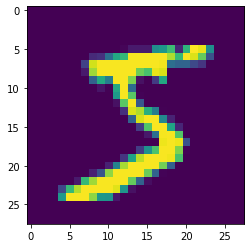

In [114]:
#check the image
import matplotlib.pyplot as pl
pl.imshow(x)

In [115]:
#check the label
y=y_train_labels[0]
print(y)

5


In [129]:
#data processing
#first: input data 3 dim -> 2 dim
x_train_images = x_train_images.reshape(-1,28*28)
x_test_images = x_test_images.reshape(-1,28*28)

#second: normalize the data
x_train_normalize = x_train_images.astype('float32') / 255.
x_test_normalize  = x_test_images.astype('float32') / 255.

In [126]:
#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)
])
#The compilation step
model.compile(
    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_labels, 
           epochs= 10, 
           batch_size= 100)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_labels)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 100)               78500     
                                                                 
 dense_115 (Dense)           (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 2.3572 - accuracy: 0.4866
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.2642 - accuracy: 0.3078
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.2228 - accuracy: 0.3053
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 2.1986 - accuracy: 0.3037
Epoch 5/10
600/600 [=========================

[2.0534932613372803, 0.351666659116745]

## 準確率:35% 有待改進

# test1: add dense 100

In [127]:
#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100), 
    #overhere
    keras.layers.Dense(100), 
    keras.layers.Dense(10)
])
#The compilation step
model.compile(
    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_labels, 
           epochs= 10, 
           batch_size= 100)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_labels)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 100)               78500     
                                                                 
 dense_117 (Dense)           (None, 100)               10100     
                                                                 
 dense_118 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 2.0706 - accuracy: 0.4847
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.4191
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.4191
Epoch 4/10
60

[2.3025569915771484, 0.41911667585372925]

## 準確率提高到41%

# test2修改optimizer->adam

In [128]:
#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100), 
    keras.layers.Dense(100), 
    keras.layers.Dense(10)
])
#The compilation step
model.compile(
    #overhere
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_labels, 
           epochs= 10, 
           batch_size= 100)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_labels)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 100)               78500     
                                                                 
 dense_120 (Dense)           (None, 100)               10100     
                                                                 
 dense_121 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 1.8996 - accuracy: 0.3922
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 1.8378 - accuracy: 0.5197
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.2968 - accuracy: 0.4443
Epoch 4/10
60

[2.3011770248413086, 0.44351667165756226]

## 準確率:44% 

## test3 output layer active function: sigmoid

In [131]:
#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100), 
    keras.layers.Dense(100), 
    keras.layers.Dense(10,activation= 'sigmoid')
])
#The compilation step
model.compile(
    #overhere
    optimizer="adam",
    #
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_labels, 
           epochs= 10, 
           batch_size= 100)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_labels)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 100)               78500     
                                                                 
 dense_126 (Dense)           (None, 100)               10100     
                                                                 
 dense_127 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8901
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.9170
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.9192
Epoch 4/10
60

[0.24854470789432526, 0.9308666586875916]

## 準確率:93%

# test4 label one-hot encoding

In [132]:
#one-hot encoding
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_labels)
y_test_onehot = utils.to_categorical(y_test_labels)

#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100), 
    keras.layers.Dense(100), 
    keras.layers.Dense(10,activation= 'sigmoid')
])
#The compilation step
model.compile(
    #overhere
    optimizer="adam",
    #loss must be categorical_crossentropy
    loss='categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_onehot, 
           epochs= 10, 
           batch_size= 100)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_onehot)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 100)               78500     
                                                                 
 dense_129 (Dense)           (None, 100)               10100     
                                                                 
 dense_130 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.3751 - accuracy: 0.8931
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.9164
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2878 - accuracy: 0.9196
Epoch 4/10
60

[0.24765031039714813, 0.9295333623886108]

## 準確率:92.9%沒什麼特別大的變化

# test5 batch size 100 -> 200

In [134]:
#one-hot encoding
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_labels)
y_test_onehot = utils.to_categorical(y_test_labels)

#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100), 
    keras.layers.Dense(100), 
    keras.layers.Dense(10,activation= 'sigmoid')
])
#The compilation step
model.compile(
    #overhere
    optimizer="adam",
    #loss must be categorical_crossentropy
    loss='categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_onehot, 
           epochs= 10, 
           batch_size= 200)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_onehot)

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 100)               78500     
                                                                 
 dense_135 (Dense)           (None, 100)               10100     
                                                                 
 dense_136 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
300/300 [==============================] - 3s 2ms/step - loss: 0.4064 - accuracy: 0.8830
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9171
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.9217
Epoch 4/10
30

[0.24761687219142914, 0.9302833080291748]

## 準確率:93%沒什麼特別大的變化

# test6 Dense add activation function relu

In [136]:
#one-hot encoding
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_labels)
y_test_onehot = utils.to_categorical(y_test_labels)

#The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100,activation= 'relu'), 
    keras.layers.Dense(100,activation= 'relu'), 
    keras.layers.Dense(10,activation= 'sigmoid')
])
#The compilation step
model.compile(
    #overhere
    optimizer="adam",
    #loss must be categorical_crossentropy
    loss='categorical_crossentropy',
    metrics= ['accuracy'])
model.summary()
#“Fitting”the model
model.fit(x_train_normalize, y_train_onehot, 
           epochs= 10, 
           batch_size= 200)
# model test : (loss,accuracy)
model.evaluate(x_train_normalize, y_train_onehot)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 100)               78500     
                                                                 
 dense_138 (Dense)           (None, 100)               10100     
                                                                 
 dense_139 (Dense)           (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8912
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.9542
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9676
Epoch 4/10
30

[0.0316920131444931, 0.9902833104133606]

## 準確率:99% 有點誇張